# Crop type prediction Using 3d Unet

In [25]:
import tifffile
import numpy as np

from skimage import io
from matplotlib import pyplot as plt

## Vista Crop Types

In [9]:

vista_crop_dict = { 0:'NA' , 1: 'ALFALFA', 2: 'BEET', 3: 'CLOVER', 4: 'FLAX', 5: 'FLOWERING_LEGUMES', 6: 'FLOWERS', 7: 'FOREST', 8: 'GRAIN_MAIZE', 9: 'GRASSLAND', 10: 'HOPS', 11: 'LEGUMES', 12: 'NA', 13: 'PERMANENT_PLANTATIONS', 14: 'PLASTIC', 15: 'POTATO', 16: 'PUMPKIN', 17: 'RICE', 18: 'SILAGE_MAIZE', 19: 'SOY', 20: 'SPRING_BARLEY', 21: 'SPRING_OAT', 22: 'SPRING_OTHER_CEREALS', 23: 'SPRING_RAPESEED', 24: 'SPRING_RYE', 25: 'SPRING_SORGHUM', 26: 'SPRING_SPELT', 27: 'SPRING_TRITICALE', 28: 'SPRING_WHEAT', 29: 'SUGARBEET', 30: 'SUNFLOWER', 31: 'SWEET_POTATOES', 32: 'TEMPORARY_GRASSLAND', 33: 'WINTER_BARLEY', 34: 'WINTER_OAT', 35: 'WINTER_OTHER_CEREALS', 36: 'WINTER_RAPESEED', 37: 'WINTER_RYE', 38: 'WINTER_SORGHUM', 39: 'WINTER_SPELT', 40: 'WINTER_TRITICALE', 41: 'WINTER_WHEAT'}



In [10]:
def get_labels_in_color(groud_truth_image):
    color_map = {
        0: [0, 0, 0],1: [0, 255, 0], 2: [0, 0, 255], 3: [255, 255, 0], 4: [255, 165, 0], 5: [255, 0, 255], 6: [0, 255, 255],   
        7: [128, 0, 128], 8: [128, 128, 0], 9: [0, 128, 0], 10: [128, 0, 0], 11: [0, 0, 128], 12: [128, 128, 128], 13: [0, 128, 128],   
        14: [255, 0, 0], 15: [255, 255, 255], 16: [192, 192, 192], 17: [255, 0, 0], 18: [0, 255, 0], 19: [0, 0, 255], 20: [255, 255, 0],   
        21: [255, 165, 0], 22: [255, 0, 255],  23: [0, 255, 255],  24: [128, 0, 128],  25: [128, 128, 0],  26: [0, 128, 0],     
        27: [128, 0, 0],  28: [0, 0, 128], 29: [128, 128, 128], 30: [0, 128, 128], 31: [0, 0, 0], 32: [255, 255, 255], 
        33: [192, 192, 192], 34: [255, 0, 0], 35: [0, 255, 0], 36: [0, 0, 255], 37: [255, 255, 0], 38: [255, 165, 0], 
        39: [255, 0, 255],  40: [0, 128, 255],  41: [0, 0, 255] }
    groud_truth_color_image = np.zeros(groud_truth_image.shape + (3,), dtype=np.uint8)
    for i in range(groud_truth_image.shape[0]):
        for j in range(groud_truth_image.shape[1]):
            segment_id_gt = groud_truth_image[i, j]
            groud_truth_color_image[i, j] = color_map[segment_id_gt]
    return groud_truth_color_image

# Visualizing lables of all crop types

In [34]:
# put the all_crop_labels.tif in the below address
labels = io.imread('/home/luser/stelar_3d/storage/first64/reassembeled_outputs_and_ground_truth/all_crop_labels.tif')


In [35]:
# ACTUAL labels of all crops 

labels_c = get_labels_in_color(labels)

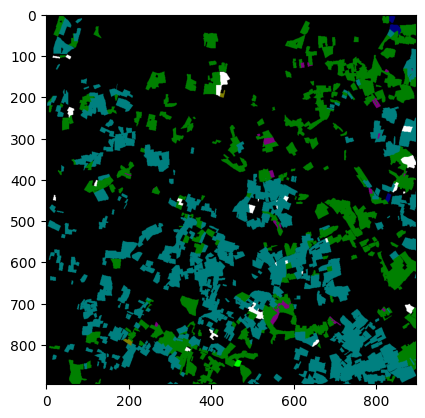

In [36]:
plt.imshow(labels_c[:896, :896])

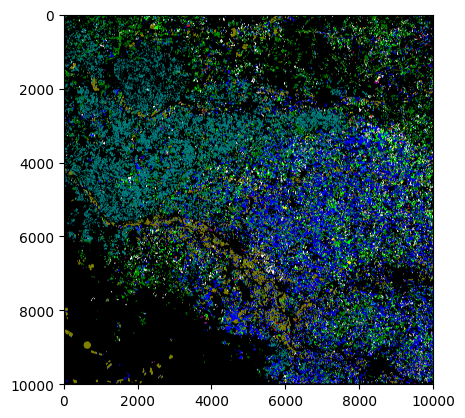

In [37]:
plt.imshow(labels_c)

# Load ground truth of chosen crop types

## selected crop types for training

0:'NA'

1: 'ALFALFA'

7: 'FOREST'

8: 'GRAIN_MAIZE'

9: 'GRASSLAND'

11: 'LEGUMES'

13: 'PERMANENT_PLANTATIONS'

32: 'TEMPORARY_GRASSLAND'


##### Loading the Ground truth of chosen crop types

In [27]:
# put the chosen_crops_ground_truth.tif in the below address
reassembled_ground_truth = io.imread('/home/luser/stelar_3d/storage/first64/reassembeled_outputs_and_ground_truth/chosen_crops_ground_truth.tif')
print(reassembled_ground_truth.shape)
print(np.unique(reassembled_ground_truth))

(10002, 10002)
[ 0.  1.  7.  8.  9. 11. 13. 32.]


In [12]:
reassembled_ground_truth_c = get_labels_in_color(reassembled_ground_truth)


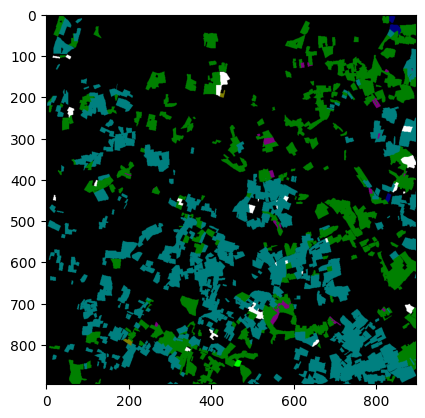

In [15]:
plt.imshow(reassembled_ground_truth_c[:896, :896])

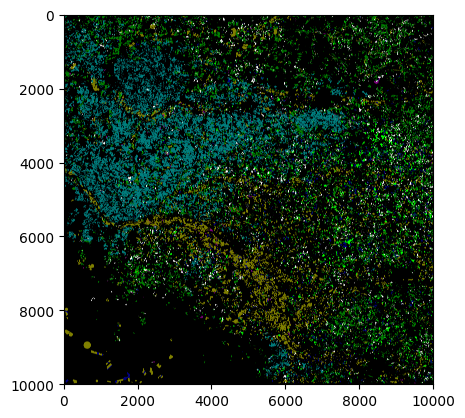

In [32]:
plt.imshow(reassembled_ground_truth_c)

#### Loading the outputs

In [29]:
# put the chosen_crops_output.tif in the below address
reassembled_output = io.imread('/home/luser/stelar_3d/storage/first64/reassembeled_outputs_and_ground_truth/chosen_crops_output.tif')


In [30]:
reassembled_output_c = get_labels_in_color(reassembled_output)


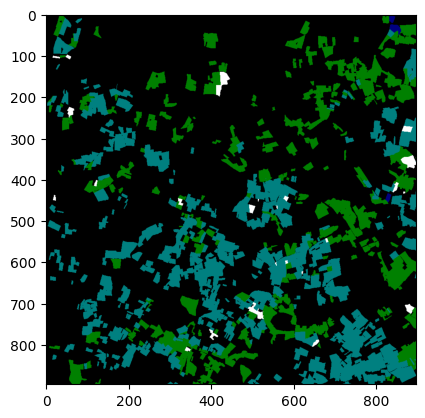

In [31]:
plt.imshow(reassembled_output_c[:896, :896])

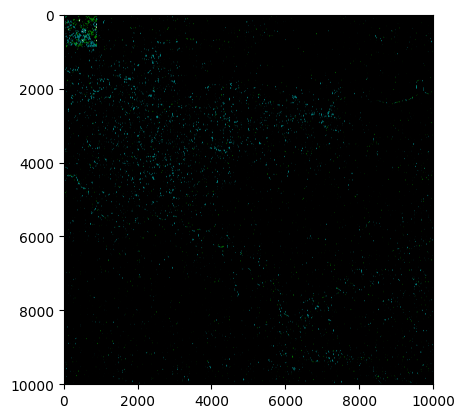

In [20]:
plt.imshow(reassembled_output_c)